<a href="https://colab.research.google.com/github/edypj/NaturalLanguageProcessing/blob/main/JournalSummarize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Library

Dalam Program ini kita akan membuat program untuk meringkas jurnal. library yang kita butuhkan adalah
1. [transformers](https://pypi.org/project/transformers/)
2. [pyPDF2](https://pypi.org/project/PyPDF2/)

In [ ]:
!pip install transformers
!pip install PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.0 MB/s eta 0:00:00


# Masukan Model

1. Masukan Model Pre-trained [Pegasus](https://research.google/blog/pegasus-a-state-of-the-art-model-for-abstractive-text-summarization/)

PEGASUS (Pre-training with Extracted Gap-sentences for Abstractive Summarization Sequence-to-sequence) adalah model berbasis Transformer yang dikembangkan oleh Google untuk tugas abstraktif summarization. PEGASUS dirancang untuk meningkatkan kinerja model summarization dengan cara yang inovatif dalam proses pre-training.

2. Masukan [MarianMTModel](https://huggingface.co/docs/transformers/en/model_doc/marian)

MarianMT adalah model terjemahan mesin berbasis arsitektur Transformer yang dikembangkan oleh Facebook AI. Nama "Marian" berasal dari perpustakaan terjemahan Marian NMT yang cepat dan efisien. Model ini dirancang untuk mendukung banyak pasangan bahasa dengan menggunakan arsitektur encoder-decoder yang sama seperti pada Transformer.

Pegasus Algorithm


```
Algorithm 1 PEGASUS Pre-training with Gap-sentences Generation
Input: D (Dokumen asli), N (Jumlah kalimat dalam dokumen), G (Jumlah kalimat gap)
Output: Model terlatih

1: for each document D in training_corpus do  // Iterasi melalui setiap dokumen dalam korpus pelatihan
2:     sentences := split_into_sentences(D)  // Pisahkan dokumen menjadi kalimat-kalimat
3:     gap_indices := select_gap_indices(N, G)  // Pilih indeks kalimat yang akan menjadi gap
4:     gap_sentences := [sentences[i] for i in gap_indices]  // Pilih kalimat gap
5:     context := [sentences[i] for i in range(N) if i not in gap_indices]  // Sisa kalimat sebagai konteks
6:     
7:     // Forward pass
8:     predicted_gap_sentences := model(context)  // Prediksi kalimat gap dari konteks
9:     
10:    // Calculate loss
11:    loss := calculate_loss(predicted_gap_sentences, gap_sentences)  // Hitung loss antara prediksi dan kalimat gap asli
12:    
13:    // Backward pass and optimization
14:    optimizer.zero_grad()  // Set gradien menjadi nol
15:    loss.backward()  // Backward pass untuk menghitung gradien
16:    optimizer.step()  // Update parameter model
17: end for

Algorithm 2 PEGASUS Fine-tuning for Summarization
Input: D (Dokumen asli), S (Ringkasan)
Output: Model terlatih untuk summarization

1: for each (document D, summary S) in summarization_corpus do  // Iterasi melalui setiap pasangan dokumen dan ringkasan dalam korpus summarization
2:     
3:     // Forward pass
4:     predicted_summary := model(D)  // Prediksi ringkasan dari dokumen
5:     
6:     // Calculate loss
7:     loss := calculate_loss(predicted_summary, S)  // Hitung loss antara prediksi ringkasan dan ringkasan asli
8:     
9:     // Backward pass and optimization
10:    optimizer.zero_grad()  // Set gradien menjadi nol
11:    loss.backward()  // Backward pass untuk menghitung gradien
12:    optimizer.step()  // Update parameter model
13: end for


```



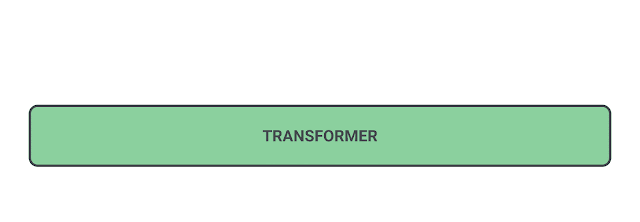

MarianMTModel Algorithm


```
Algorithm MarianMT Translation
Input: source_text (x), source_language (src_lang), target_language (tgt_lang)
Output: translated_text (y)

1: T(x) := tokenizer(x)  // Tokenization
2: E(T(x)) := encoder(T(x))  // Encoding
3: T(y) := decoder(E(T(x)))  // Decoding
4: y := detokenizer(T(y))  // Detokenization

Return y

```



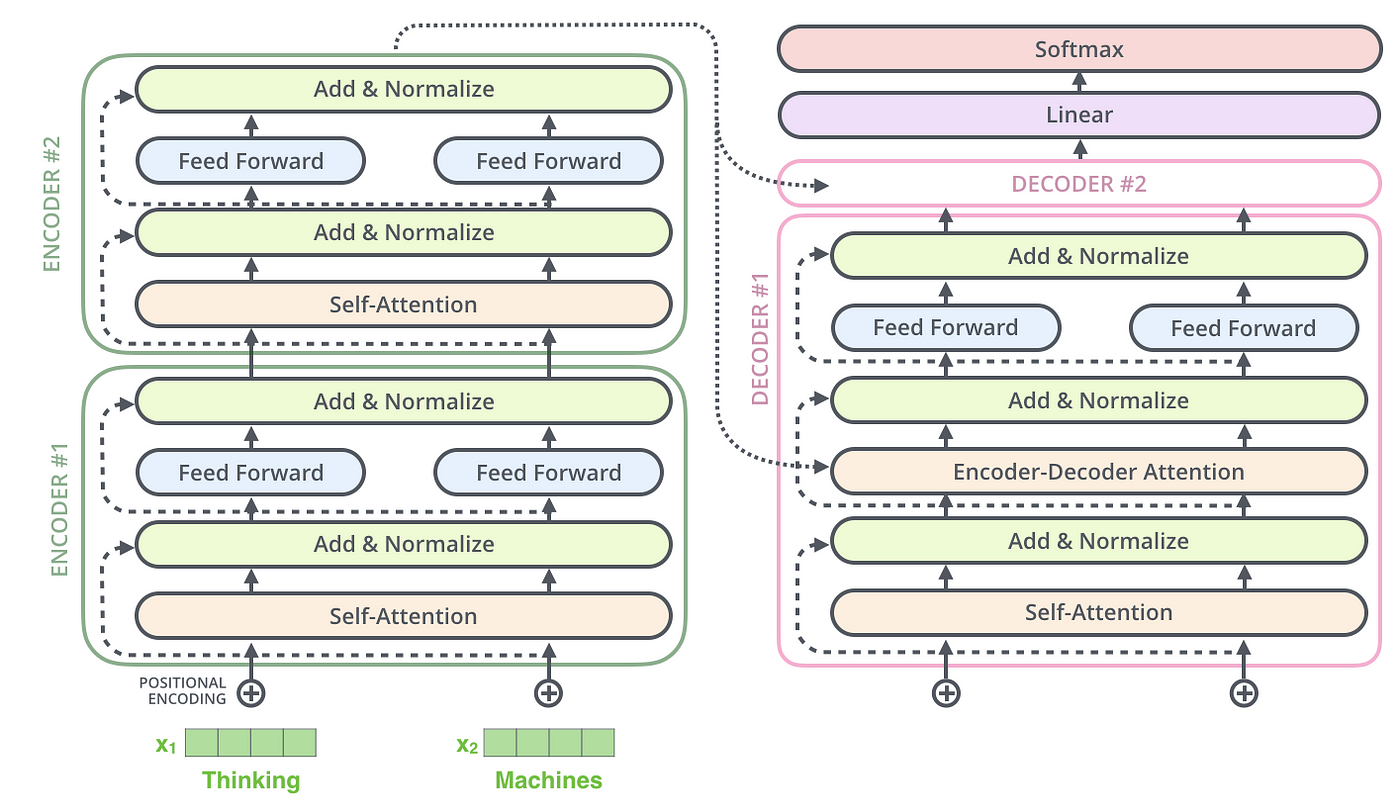

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer, MarianMTModel, MarianTokenizer

# Load summarization model and tokenizer
summarization_model_name = "google/pegasus-xsum"
summarization_model = PegasusForConditionalGeneration.from_pretrained(summarization_model_name)
summarization_tokenizer = PegasusTokenizer.from_pretrained(summarization_model_name)

# Load translation model and tokenizer
translation_model_name = "Helsinki-NLP/opus-mt-en-id"
translation_model = MarianMTModel.from_pretrained(translation_model_name)
translation_tokenizer = MarianTokenizer.from_pretrained(translation_model_name)

def summarize_text(text):
    # Batasi panjang input teks
    inputs = summarization_tokenizer(text, max_length=1024, return_tensors="pt", truncation=True)
    summary_ids = summarization_model.generate(inputs["input_ids"], max_length=150, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = summarization_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def translate_text(text, src_lang="en", tgt_lang="id"):
    inputs = translation_tokenizer(text, return_tensors="pt", truncation=True)
    translated_ids = translation_model.generate(inputs["input_ids"], max_length=1024, num_beams=4, early_stopping=True)
    translated_text = translation_tokenizer.decode(translated_ids[0], skip_special_tokens=True)
    return translated_text


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


# Pipeline Jurnal Summarize

PIPELINE Jurnal Summarize
1. Program akan membaca file pdf
2. Model Pegasus melakukan Summarize
3. Hasil Summarize akan ditranslate ke bahasa Indonesia

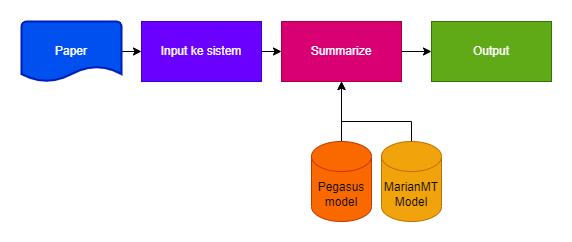

In [ ]:
import PyPDF2

def read_pdf(file):
    pdf_reader = PyPDF2.PdfReader(file)
    text = ''
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        text += page.extract_text()
    return text


In [ ]:
from google.colab import files
import IPython.display as display
import ipywidgets as widgets

# Widget untuk mengunggah file
upload_button = widgets.FileUpload(
    accept='.pdf',  # hanya menerima file PDF
    multiple=False  # hanya satu file
)

display.display(upload_button)

def on_upload_change(change):
    if len(upload_button.value) > 0:
        file_info = list(upload_button.value.values())[0]
        file_content = file_info['content']

        # Membaca file PDF
        with open("uploaded_file.pdf", "wb") as f:
            f.write(file_content)
        with open("uploaded_file.pdf", "rb") as f:
            text = read_pdf(f)

        # Menampilkan teks asli
        print("Original Text:")
        print(text[:2000])  # Batasi output untuk teks asli agar tidak terlalu panjang

        # Melakukan summarize teks
        summary = summarize_text(text[:1024])  # Batasi input teks untuk summarize

        # Menampilkan ringkasan
        print("\nSummary:")
        print(summary)

        # Menerjemahkan ringkasan
        translated_summary = translate_text(summary)

        # Menampilkan ringkasan yang diterjemahkan
        print("\nTranslated Summary (ID):")
        print(translated_summary)

upload_button.observe(on_upload_change, names='value')


FileUpload(value={}, accept='.pdf', description='Upload')

Original Text:
Jurnal Teknik Informatika vol. 15  no. 4  Oktober -Desember ,  hal. ? -? 
p-ISSN : 2301 -8402 , e-ISSN : 2685 -368X   ,dapat diakses melalui https://ejournal.unsrat.ac.id/index.php/informatika  1 
 
Abstract — Limiting the capacity of visitors to a place is 
very necessary in the current situation and conditio ns. This is 
because it is to prevent crowds of people in one place, because 
it is known together with the health protocols from the 
government that each person must conduct outreach. For this 
reason, it is necessary to know the number of people who enter 
and leave a building, so that it can be seen whether the visitor 
capacity has reached the maximum number or not. The job of 
counting the number of visitors to a place is still easy to do if 
it's on a small scale, but what if it's on a large scale. By 
utiliz ing technology in the field of computer vision, this study 
aims to perform and calculate the number of humans 
automatically. This research uses algor